In [1]:
from xcube.core.store import new_data_store
import matplotlib.pyplot as plt
import os

In [2]:
s3_store = new_data_store(
    "s3",
    root=os.environ["S3_USER_STORAGE_BUCKET"],
    max_depth=10,
    storage_options=dict(
        anon=False,
        key=os.environ["S3_USER_STORAGE_KEY"],
        secret=os.environ["S3_USER_STORAGE_SECRET"],
    ),
)

In [3]:
cube = s3_store.open_data("cubes/science/0.1.0/008.zarr")
cube

<xarray.Dataset> Size: 58GB
Dimensions:                   (angle: 2, angle_x: 2, angle_y: 2, band: 12,
                               time: 1155, y: 1000, x: 1000, time_era5: 2983,
                               time_lccs: 7)
Coordinates:
  * angle                     (angle) <U7 56B 'Zenith' 'Azimuth'
  * angle_x                   (angle_x) float64 16B 3.525e+05 3.575e+05
  * angle_y                   (angle_y) float64 16B 5.393e+06 5.388e+06
  * band                      (band) <U5 240B 'B01' 'B02' 'B03' ... 'B11' 'B12'
    spatial_ref               int64 8B ...
  * time                      (time) datetime64[ns] 9kB 2016-11-01T10:32:02.0...
  * time_era5                 (time_era5) datetime64[ns] 24kB 2016-11-01 ... ...
  * time_lccs                 (time_lccs) datetime64[ns] 56B 2016-01-01 ... 2...
  * x                         (x) float64 8kB 3.525e+05 3.525e+05 ... 3.625e+05
  * y                         (y) float64 8kB 5.398e+06 5.398e+06 ... 5.388e+06
Data variables: (12/118)
    cloud_mask                (time, y, x) uint8 1GB dask.array<chunksize=(20, 500, 500), meta=np.ndarray>
    dem                       (y, x) float32 4MB dask.array<chunksize=(500, 500), meta=np.ndarray>
    era5_d2m_max              (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    era5_d2m_mean             (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    era5_d2m_median           (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    era5_d2m_min              (time_era5) float32 12kB dask.array<chunksize=(2983,), meta=np.ndarray>
    ...                        ...
    lccs_observation_count    (time_lccs, y, x) uint16 14MB dask.array<chunksize=(7, 500, 500), meta=np.ndarray>
    lccs_processed_flag       (time_lccs, y, x) float32 28MB dask.array<chunksize=(7, 500, 500), meta=np.ndarray>
    s2l2a                     (band, time, y, x) float32 55GB dask.array<chunksize=(12, 20, 500, 500), meta=np.ndarray>
    scl                       (time, y, x) uint8 1GB dask.array<chunksize=(20, 500, 500), meta=np.ndarray>
    solar_angle               (time, angle, angle_y, angle_x) float32 37kB dask.array<chunksize=(1, 2, 2, 2), meta=np.ndarray>
    viewing_angle             (time, angle, band, angle_y, angle_x) float32 444kB dask.array<chunksize=(1, 2, 12, 2, 2), meta=np.ndarray>
Attributes: (12/24)
    Conventions:                  CF-1.8
    acknowledgment:               DeepFeatures project
    affine_transform:             [10.0, 0.0, 352525.0, 0.0, -10.0, 5398035.0...
    bbox_utm:                     [352530, 5388040, 362520, 5398030]
    bbox_wgs84:                   [6.998609285572609, 48.62802828358838, 7.13...
    center_utm:                   [5393035.398622853, 357525.7941001728]
    ...                           ...
    last_modified_datetime:       2025-05-21T13:08:52.254750
    project:                      DeepFeatures
    time_range_end:               2024-12-31
    time_range_start:             2016-11-01
    utm_zone:                     32U
    version:                      0.1.0

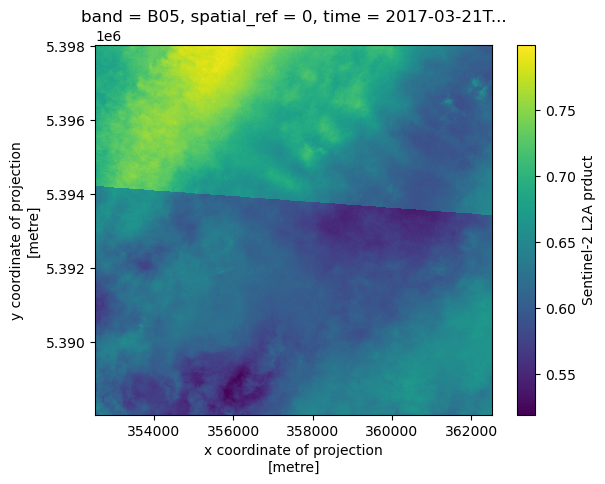

In [8]:
cube.s2l2a.isel(time=26, band=4).plot()

In [12]:
stac_ids = cube.s2l2a.attrs["stac_item_ids"]["2017-03-21T10:30:11.026000"]
stac_ids

['S2A_MSIL2A_20170321T103011_N0500_R108_T31UGP_20231101T112417',
 'S2A_MSIL2A_20170321T103011_N0500_R108_T31UGQ_20231101T112417',
 'S2A_MSIL2A_20170321T103011_N0500_R108_T32ULU_20231101T112417',
 'S2A_MSIL2A_20170321T103011_N0500_R108_T32ULV_20231101T112417']

In [13]:
credentials = dict(
    key="O0M0CUQIDQO9TDZ4D8NR",
    secret="qPUyXs9G6j8on6MY5KPhQNHuA5uZTqxEscrbBCGx"
)

In [14]:
store = new_data_store("stac-cdse", **credentials)

In [15]:
dss = []
for stac_id in stac_ids:
    ds = store.open_data(f"collections/sentinel-2-l2a/items/{stac_id}")
    dss.append(ds)

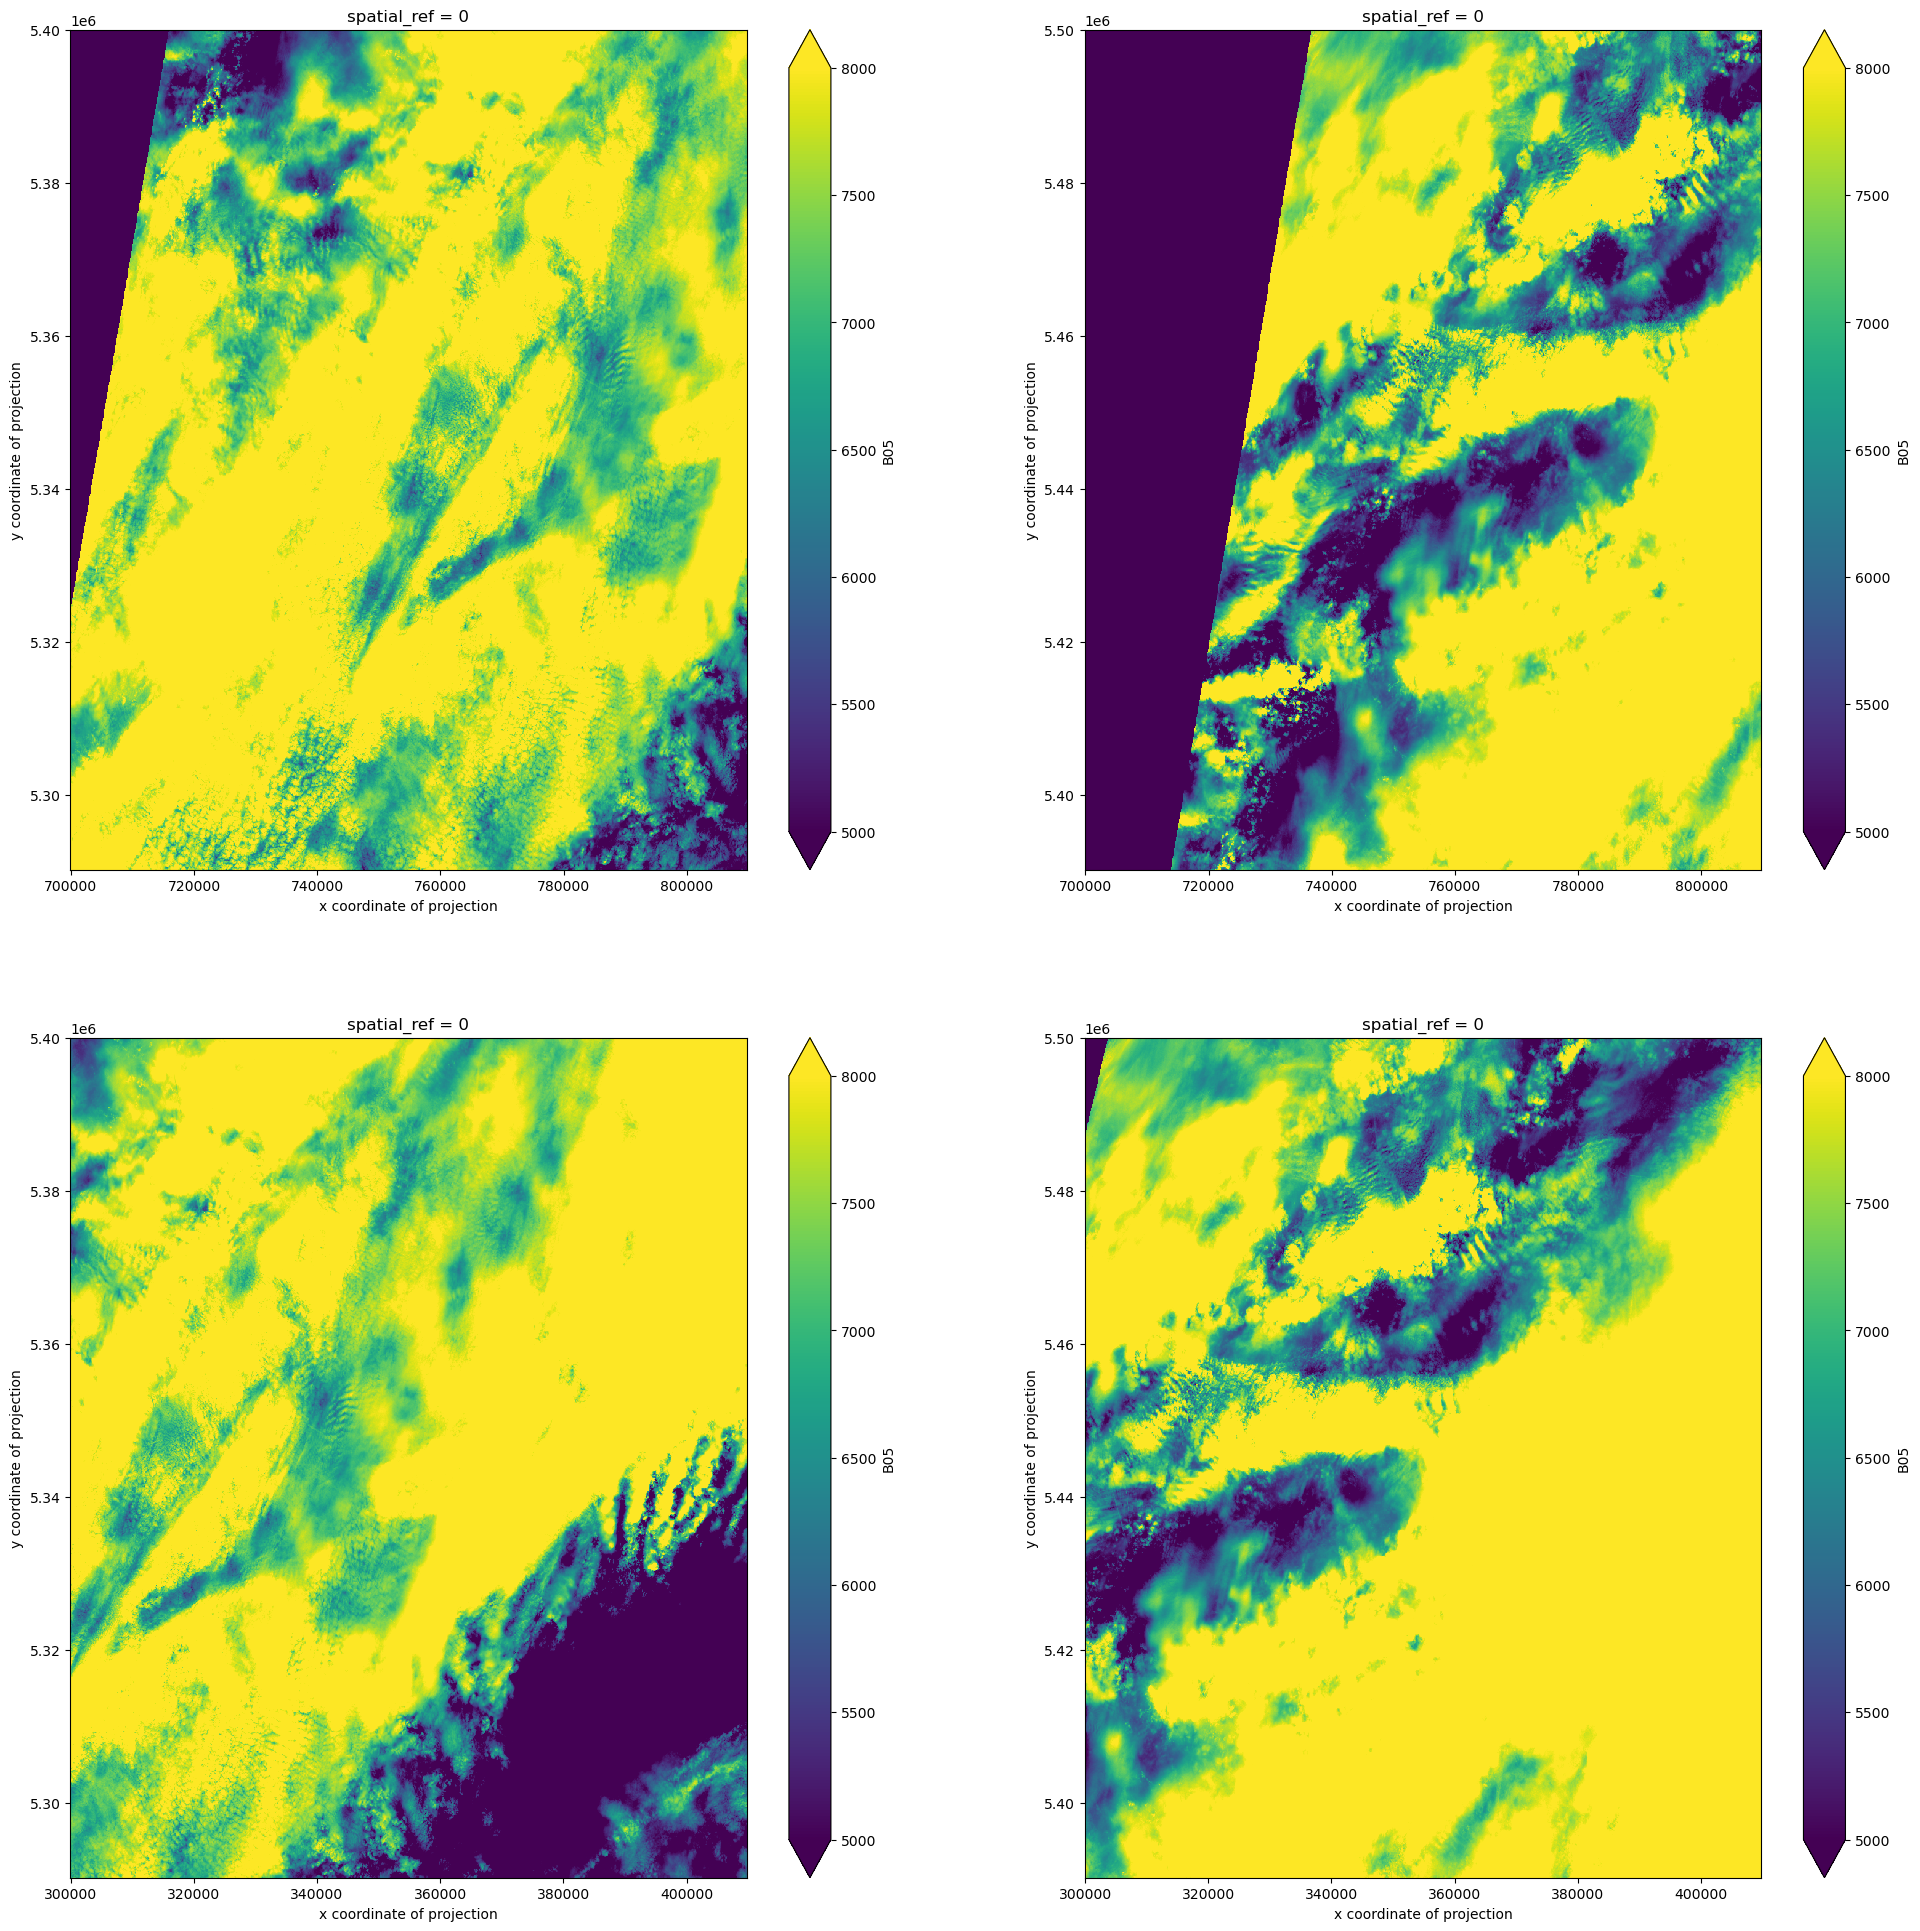

In [16]:
fig, _ax = plt.subplots(2, 2, figsize=(6*4, 6*4))
ax = _ax.flatten()
for i in range(4):
    dss[i].B05[::10, ::10].plot(ax=ax[i], vmin=5000, vmax=8000)